# Introduction à la TFD et l'analyse de Fourier

On aura besoin des fonctions suivantes

In [1]:
from scipy.signal import hann
from numpy.fft import fft, ifft
from pylab import *

1. Créer un signal temporel sinusoidal x(t) de type A(1+cos(2*pi*f0*t)) avec f0=5 et une fréquence d'échantillonnage Fe =32, sur N points avec N = 1024.
2. Visualiser l'allure temporelle du signal
3. Calculer la transformée de Fourier X du signal x(t)
4. Visualiser le spectre (module de la transformée de Fourier)

In [ ]:
## code ici 

Modulation numérique du signal :

1. La modulation en amplitude d'un signal consiste à le multiplier par un signal sinusoidal cos(2*pi*f*t), f étant la fréquence porteuse. 
- Calculer le signal modulé y(t)
- Visualiser l'allure temporelle
- Calculer théoriquement la TF de y(t) et confirmer avec Python l'allure du spectre


In [1]:
## code ici

Démodulation du signal :

2. La démodulation du signal modulé en amplitude se fait par une multiplication d'un signal sinusoidal.

- Quelle est la fréquence du signal de démodulation ? Faites le calcul du signal démodulé et démontrer comment peut-on retrouver le signal x(t) d'origine (justifier l'intérêt du filtrage passe-bas).

- Programmer la démodulation avec Python et vérifier qu'on retouve bien le signal d'origine.


In [2]:
## code ici

## Vers la TFD. Dualité échantillonnage-périodisation

1. Créer une fonction _repeat(x,n)_ permettant de périodiser un signal. Vous pourrez utiliser pour ce faire le fait que sous Python, [(x)*n]=((x) (x) ...(x)) , où x est une liste quelconque. 
2. Tester cette fonction, par exemple en prenant _x=randn(10)_, ou _x=hann(50)_, 

In [15]:
def repeat(x,n):
    u""" repeat(x,n) -- x ndarray, n integer 
    Répète n fois la séquence x """
    ## votre code ici
    return array(list(x)*n)

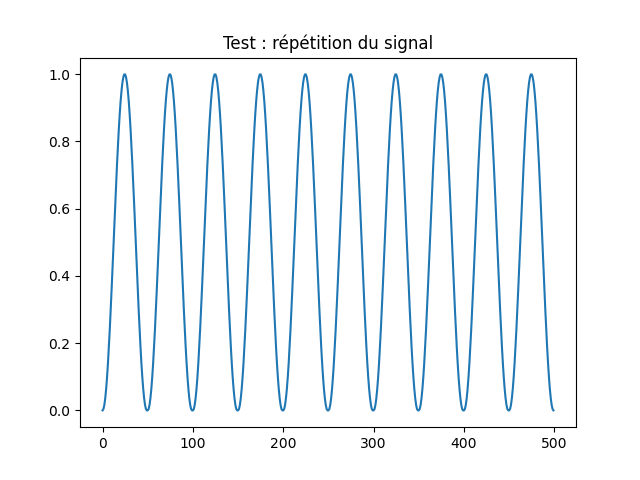

In [16]:
# Test repeat
w=hann(50,sym=True)
rr=array(repeat(list(w),10))
#r=rr.reshape(rr.size,1)
r=rr.flatten()
figure(1)
clf()
plot(r)
title('Test : répétition du signal' )
show()

1. Créer une fonction _echant(x,step)_ permettant de sous échantilloner un signal, en ne retenant qu'un point tous les -step_. 
2. Tester cette fonction, par exemple en prenant _x=range(100)_, _x=randn(10)_, ou _x=hann(50)_, 

In [17]:
def echant(x,step):
    z=zeros(x.shape)
    z[::step] = x[::step]
    return z

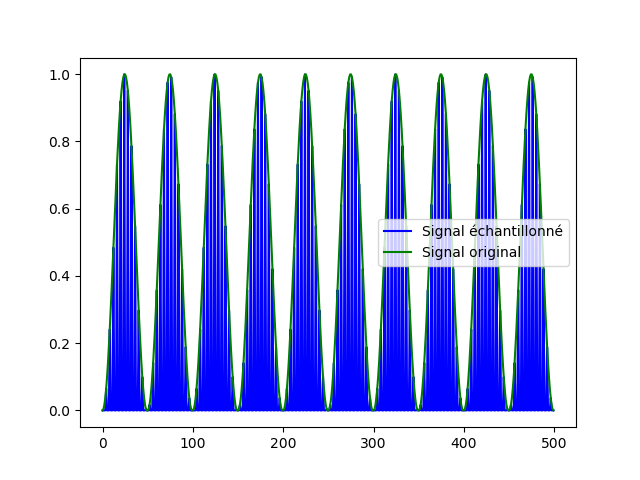

In [18]:
# test echant
L=len(r)
t=arange(L)
figure(2)
clf()
plot(t,echant(r,4),color='blue',label=u'Signal échantillonné')
plot(t,r,color='green',label='Signal original')
legend()
show()

### Manipulations - 

Vous disposez d’un signal $x(n)$, échantillonné à $Fe = 32$.

1) Chargez ce signal par 
$$
f=numpy.load('signal.npz')
#f.keys()
x=f['x'].flatten()
$$
Le signal est alors chargé dans l’environnement sous le nom x.
Visualisez x dans le domaine temporel et fréquentiel. Quelle est sa durée temporelle ? Quelle est approximativement la bande occupée ?



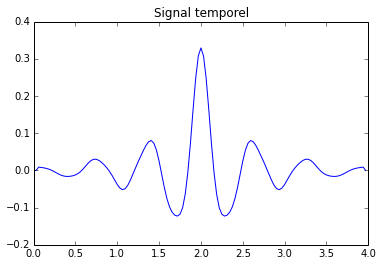

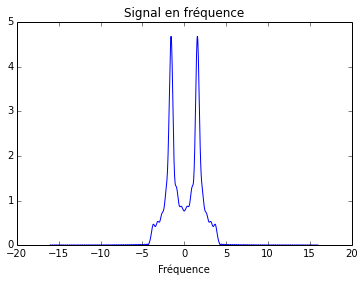

In [67]:
#========= =========================
f=numpy.load('signal.npz')
#f.keys()
x=f['x'].flatten()
# On décide que la fréquence d'échantillonnage Fe vaut 32
Fe, Te = 32, 1/32
N=len(x)
M=8*N  #Utilisé comme longueur des fft
# Et on définit les vecteurs t et f

## t= .... compléter ici
## f= .... commléter ici

figure(3)
#subplot(121)
plot(t,x)
title('Signal temporel')
figure(4)
#subplot(122)

### faire le plot de la fft ici, s'inspirer du TP précédent

title('Signal en fréquence')
xlabel('Fréquence')
show()


Zoomons un peu sur cette représentation :

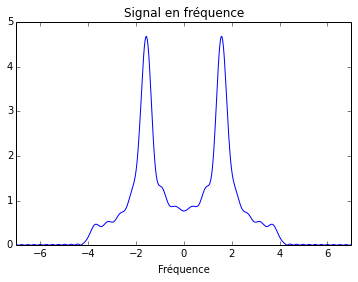

In [68]:
figure(4)
### xf est la fft comme dans la cellule précédente
plot(f,abs(xf))
title('Signal en fréquence')
xlabel('Fréquence')
xlim([-7, 7])  ### c'est avec ceci qu'on peut faire un zoom
show()
     

On voit donc que la bande de fréquence est de l'ordre de 4.1 Hz

La durée temporelle, quant-à-elle, est de l'ordre de 4 s. 

2) On étudie d’abord l’effet d’une répétition du signal. Créez un nouveau signal, _xr(n)_ et répétant 8
fois le motif _x(n)_ (fonction $\verb!repeat!$). Visualisez le signal temporel, puis comparez les réponses en
fréquence de _x(n)_ et _xr (n)_. Conclusions.


(-5, 5)

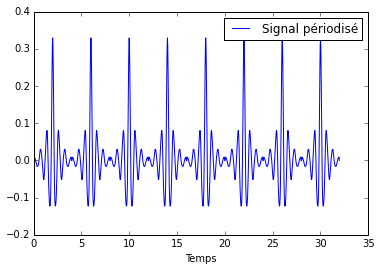

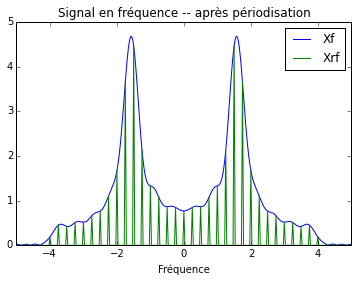

In [90]:
xr=repeat(x,8)
tr=arange(len(xr))*Te
### xrf est la fft de xr

figure(5)
clf()
plot(tr,xr, label='Signal périodisé')
#plot(arange(len(xr))*Te,xr, label='Signal périodisé')
#
#stem(t,xe,linefmt='g-',markerfmt='bo', basefmt='b-')
#plot(t,xe,label=u'Signal sous échantillonné')
xlabel('Temps')
legend()

figure(6)
plot(f,abs(xf),label='Xf')
plot(f,abs(xrf)/8,label='Xrf')
legend()
title('Signal en fréquence -- après périodisation')
xlabel('Fréquence')
xlim([-5,5]) 

On peut vérifier que l'intervalle en les raies est de 0.25, soit l'inverse de la période du signal.

On observe ainsi que la périodisation induit un échantillonnage en fréquence, et que si la périodisation a été effectuée avec un pas de T, alors cet échantillonnage fait apparaître des raies fréquentielles tous les 1/T
$$
\bbox[5px,border:2px solid red]{
\text{Périodisation à } T \rightarrow \text{échantillonnage à } \frac{1}{T}
}
$$

$\underline{\text{Remarque}}$ : on pourra vérifier que pour la TFD, on a en réalité 
$$
w_L(n) \rightleftharpoons  L \times w_\frac{1}{L}(k)
$$

3) On s’intéressera ensuite aux effets de l’échantillonnage : rééchantillonnez le signal aux fréquences
Fse = 16, Fse = 8, Fse = 4 (créez les signaux xe1(n), xe2(n) et xe3(n)), en utilisant la fonction 
$\verb!echant!$. Visualisez les signaux temporels, et comparez les réponses fréquentielles (toujours sur
[−Fe/2, Fe/2], avec Fe = 32, la fréquence d’échantillonnage initiale).


In [120]:
def sech(x,k,M=M):
    """ Sous échantillonnage de x par un facteur k
    Rend x sous échantilloné et sa TF"""
    ### xe=  ???
    ### xef= ???
    return (xe, xef)

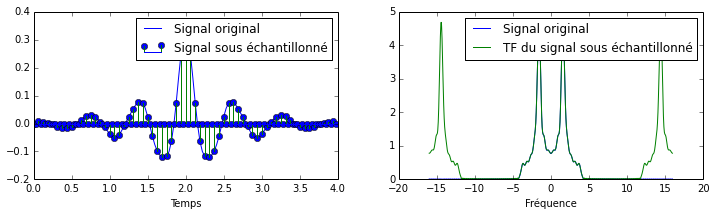

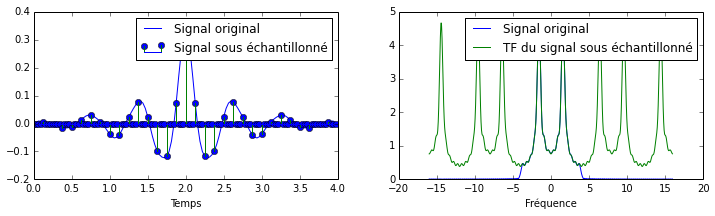

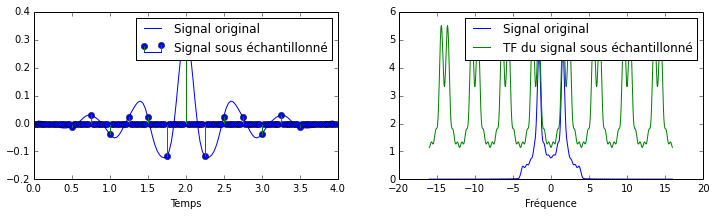

In [124]:
num=7
for k in (2, 4, 8):
    figure(num+1,figsize=(12, 3))
    subplot(1,2,1)
    plot(t,x, label='Signal original')
    stem(t,sech(x,k)[0],linefmt='g-',markerfmt='bo', basefmt='b-',label=u'Signal sous échantillonné')
    xlabel('Temps')
    legend()
    #
    subplot(1,2,2)
    plot(f,abs(xf), label='Signal original')
    xef=sech(x,k)[1]
    plot(f,k*abs(xef),label='TF du signal sous échantillonné')
    # Le facteur k ci-dessus prend en compte la puissance perdue dans le sous éch
    xlabel('Fréquence')
    legend()
    num+=1

On observe ainsi que l'échantillonnage entraîne une périodisation en fréquence, et que s'échantillonage a été effectué avec un pas de Te, alors cette périodisation est de période Fe=1/Te
$$
\bbox[5px,border:2px solid red]{
\text{échantillonnage à } T_e \rightarrow \text{Périodisation à } F_e=\frac{1}{T_e}
}
$$

En outre, on vérifie bien la condition d'échantillonage de Shannon : dès que la fréquence d'échantillonnage devient inférieur à 2$\times$ la bande, alors il peut se produire du _recouvrement_. 

On termine en examinant ce qu'il se passe lorsque l'on a à la fois échantillonnage et périodisation. Très naturellement, les deux effets se conjuguent et on associe alors à une séquence périodique échantillonnée une autre séquence périodique échantillonnée.


4) Créez enfin un signal périodique échantillonné xre (n), en périodisant le signal initial (en créant par
exemple 8 périodes) puis en échantillonnant le signal résultant. Analysez le signal obtenu en temps et
en fréquence. Conclusions.


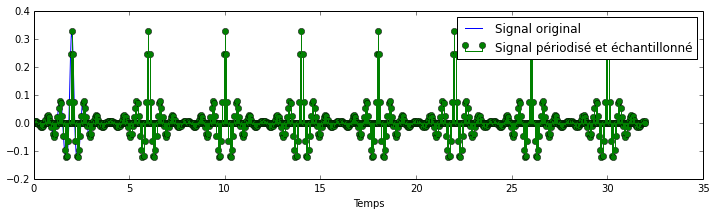

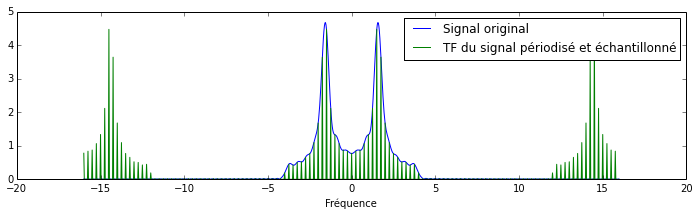

In [132]:
num=11
### xre= ???
figure(num+1,figsize=(12, 3))
plot(t,x, label='Signal original')
stem(tr,xre,linefmt='g-',markerfmt='go', basefmt='g-',label=u'Signal périodisé et échantillonné')
xlabel('Temps')
legend()

   #
figure(num+2,figsize=(12, 3))
plot(f,abs(xf), label='Signal original')
plot(f,abs(fftshift(fft(xre,M)))/4,label='TF du signal périodisé et échantillonné')
# Le facteur k ci-dessus prend en compte la puissance perdue dans le sous éch
xlabel('Fréquence')
legend()

Ces deux séquences échantillonnées périodiques sont reliées par une transformée de Fourier. Il n'est utile de calculer cette transformée de Fourier que sur *une* période de $N=T/T_e$ points (puisque le signal est périodique), et il lui correpondra une TF périodique avec une période également sur $F_e/F=T/T_e=N$ points. On arrive alors à une correspondance entre deux séquences de $N$ points. C'est l'essence de la TFD. 

## Analyse sur une durée limitée - résolution
On crée une sinusoïde sur 1000 points, avec une fréquence normalisée $f_0=0.05$. Remarquons  que sur N=1000 points, on a exactement $Nf_0=50$ périodes, et qu'ici ce nombre est entier. On examinera plus tard ce qu'il advient lorsque le nombre de périodes n'est pas entier. 

In [ ]:
fo=0.05
N=1000
t=arange(N)
### x=sin(???)
figure(1)
plot(t,x)
title("Sinusoide")
xlabel("Temps")
xlim([0, 100])

In [ ]:
from numpy.fft import fft, ifft
M=1000 # Nombre de points de calcul de la fft : 1000
### X= ??? fft de x 
### f= ??? axe des fréquences 
figure(2)
plot(f,fftshift(abs(X)))
title("Sinusoide")
xlabel("Fréquences")
xlim([-0.15, 0.15])

Supposons maintenant que la sinusoïde soit de durée limitée, par exemple sur $L=100$ ou $L=50$ points. Créez une sinusoïde tronquée `x_tronq` sur $L$ points (créez un vecteur de zéros puis remplissez les $L$ premiers points par la sinusoïde).   Examinez ensuite ce que vaut alors sa TF, et comparez ce résultat à la TF initiale (pour la visualisation, prendre en compte un facteur d'amplitude $L/N$ reflétant le fait qu'il y a moins d'énergie dans le signal tronqué) :

In [ ]:
L=100
x_tronq=zeros(1000)
t=arange(L)
x_tronq[t]=sin(2*pi*fo*t)
plot(x_tronq)

On recalcule et visualise la TF par les mêmes lignes que précédemment

In [ ]:
M=1000 # Nombre de points de calcul de la fft : 1000
### X_tronq : fft de X_tronq
f=arange(M)/M-1/2
figure(3)
plot(f,N/L*fftshift(abs(X_tronq)),label="Sin tronqué")
plot(f,fftshift(abs(X)),label="Sin initial")
title("Sinusoides initiale et tronquée")
xlabel("Fréquences")
xlim([-0.15, 0.15])
legend()

Il est donc apparent que les impulsions de départ ont été "élargies" par la limitation temporelle. 

En fait, le signal de départ peut-être vu comme ayant été multiplié par une fenêtre rectangulaire pour donner le signal tronqué. Il s'en suit une convolution dans le domaine fréquentiel. Vérifiez ceci en calculant la TF d'une fenêtre rectangulaire et en convoluant celle-ci (fonction `convolve` de numpy) avec la TF de la sinuoïde initiale. 

- Convoluez les TF *centrées*, ie après un `fftshift`, sinon il peut y avoir des effets de bords désagréables
- Il y a un facteur N après la convolution - en tenir compte dans la comparaison

In [ ]:
z=zeros(1000)
t=arange(L)
z[t]=1
Z=fft(z,N)
figure(4)
plot(f,fftshift(abs(Z)),label="TF rectangle")
xlabel("Fréquences")
xlim([-0.15, 0.15])
legend()

In [ ]:
Z=squeeze(Z)
X=squeeze(X)
### Res_conv est la convolution de fftshift(Z) et de fftshift(X)

figure(5)
plot(f,(abs(Res_conv)),label="Convolution")
plot(f,N*fftshift(abs(X_tronq)),label="TF directe")
xlabel("Fréquences")
xlim([-0.15, 0.15])
legend()